In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch

In [3]:
# Making training data
# Input ---> (temp, rainfall, humidity) ---> yield of apple and oranges crops

inputs = np.array([
    [73, 67,43],
    [91, 88, 64],
    [87, 134, 58],
    [102, 43, 37],
    [69, 96, 70],
], dtype = 'float32')

In [4]:
# Target (apples, oranges)

target = np.array([
    [56, 70],
    [81, 101],
    [119, 113],
    [22, 37],
    [103, 119]
], dtype = 'float32')

In [5]:
inputs = torch.from_numpy(inputs)
target = torch.from_numpy(target)

In [6]:
print(inputs)
print(target)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 113.],
        [ 22.,  37.],
        [103., 119.]])


In [7]:
# Weights and biases
w= torch.randn(2, 3, requires_grad=True)
b= torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.2405, -0.1433, -0.8525],
        [-0.3976, -0.5843,  0.7872]], requires_grad=True)
tensor([-1.8330,  1.9686], requires_grad=True)


In [8]:
# define the model

# Z = X * W + B
def model(x):
  return x @ w.t() + b

In [9]:
# prediction
preds = model(inputs)
print(preds)

tensor([[-30.5366, -32.3511],
        [-47.1197, -35.2460],
        [-49.5597, -65.2561],
        [-15.0075, -34.5811],
        [-58.6722, -26.4505]], grad_fn=<AddBackward0>)


In [10]:
# loss funtion we will use is MSE -> Mean squared error
def MSE(y, y_hat):
  diff = y - y_hat

  return torch.sum(diff*diff)/diff.numel()

In [11]:
# error
loss = MSE(target, preds)
print(loss)

tensor(16691.6699, grad_fn=<DivBackward0>)


In [12]:
#Compute gradients
loss.backward()

In [13]:
print(w)
print(w.grad)

tensor([[ 0.2405, -0.1433, -0.8525],
        [-0.3976, -0.5843,  0.7872]], requires_grad=True)
tensor([[ -9514.1816, -11354.2695,  -6876.7065],
        [-10543.1299, -11954.9434,  -7257.9453]])


In [14]:
print(b)
print(b.grad)

tensor([-1.8330,  1.9686], requires_grad=True)
tensor([-116.3791, -126.7769])


In [15]:
#reset grad
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

In [16]:
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [17]:
# Adjust params

preds = model(inputs)

print(preds)


loss = MSE(target, preds)
print(loss)

tensor([[-30.5366, -32.3511],
        [-47.1197, -35.2460],
        [-49.5597, -65.2561],
        [-15.0075, -34.5811],
        [-58.6722, -26.4505]], grad_fn=<AddBackward0>)
tensor(16691.6699, grad_fn=<DivBackward0>)


In [18]:
loss.backward()

print(w.grad)
print(b.grad)

tensor([[ -9514.1816, -11354.2695,  -6876.7065],
        [-10543.1299, -11954.9434,  -7257.9453]])
tensor([-116.3791, -126.7769])


In [21]:
# adjust weight & reset grad

learning_rate = 1e-5

with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

  w.grad.zero_()
  b.grad.zero_()

In [22]:
print(w)
print(b)

tensor([[ 0.3356, -0.0298, -0.7837],
        [-0.2921, -0.4647,  0.8598]], requires_grad=True)
tensor([-1.8318,  1.9698], requires_grad=True)


In [23]:
# Calculate again

preds = model(inputs)
loss = MSE(target, preds)
print(loss)

tensor(11469.3965, grad_fn=<DivBackward0>)


In [24]:
# Training for muliple epochs
for i in range(400):
  preds = model(inputs)
  loss = MSE(target, preds)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

    w.grad.zero_()
    b.grad.zero_()
  print(f"Epochs({i}/{100}) & Loss {loss}")

Epochs(0/100) & Loss 11469.396484375
Epochs(1/100) & Loss 7947.63134765625
Epochs(2/100) & Loss 5571.845703125
Epochs(3/100) & Loss 3968.35400390625
Epochs(4/100) & Loss 2885.328125
Epochs(5/100) & Loss 2153.069091796875
Epochs(6/100) & Loss 1657.216064453125
Epochs(7/100) & Loss 1320.703857421875
Epochs(8/100) & Loss 1091.598388671875
Epochs(9/100) & Loss 934.9015502929688
Epochs(10/100) & Loss 827.0289306640625
Epochs(11/100) & Loss 752.0863037109375
Epochs(12/100) & Loss 699.36279296875
Epochs(13/100) & Loss 661.6402587890625
Epochs(14/100) & Loss 634.053466796875
Epochs(15/100) & Loss 613.3242797851562
Epochs(16/100) & Loss 597.2427368164062
Epochs(17/100) & Loss 584.3194580078125
Epochs(18/100) & Loss 573.5504150390625
Epochs(19/100) & Loss 564.2587280273438
Epochs(20/100) & Loss 555.9879150390625
Epochs(21/100) & Loss 548.4296264648438
Epochs(22/100) & Loss 541.3765869140625
Epochs(23/100) & Loss 534.6881103515625
Epochs(24/100) & Loss 528.2694702148438
Epochs(25/100) & Loss 522.

In [25]:
preds = model(inputs)
loss = MSE(target, preds)
print(loss)

tensor(37.5191, grad_fn=<DivBackward0>)


In [26]:
from math import sqrt
sqrt(loss)

6.125283059566672

In [27]:
preds

tensor([[ 58.2879,  67.9695],
        [ 77.4008,  99.7453],
        [127.8128, 114.0794],
        [ 28.8271,  41.2108],
        [ 88.6782, 117.2619]], grad_fn=<AddBackward0>)

In [28]:
target

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 113.],
        [ 22.,  37.],
        [103., 119.]])

In [29]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

In [30]:
# Download training data from open datasets

training_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download = True,
    transform = ToTensor(),
)

# Download test data from open datasets

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 276kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.08MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.8MB/s]


In [31]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [32]:
batch_size = 64

# Create data loaders

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
  print("Shape of X [N, C, H, W] ", X.shape)
  print("Shape of y: ", y.shape, y.dtype)
  break

Shape of X [N, C, H, W]  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [33]:
# Get cpu or gpu device for training

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [34]:
# Define the NN Model
class NeuralNetwork(nn.Module):

  def __init__(self):
    super(NeuralNetwork, self).__init__()

    self.flatten = nn.Flatten()

    # Hidden Layers with ReLU activation function
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10) # Output layer
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


model= NeuralNetwork().to(device)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [35]:
# Cross Entropy Loss ----> Because it is a multiclass classification problem

loss_fn = nn.CrossEntropyLoss()

# Optimizer ---> SGD ---> Stochastic Gradient Descent
# lr = Learning Rate
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [36]:
# Model Training

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y= X.to(device), y.to(device) # related to gpu computation

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch %100 ==0 :
      loss, current = loss.item(), batch * len(X)
      print(f"Loss: {loss} [{current}/{size}]")

In [38]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)

  num_batches = len(dataloader)

  model.eval()

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)

      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches # average loss per batch
  correct /= size # %age of correct predictions or accuracy

  print(f"Test Error: \n Accuracy: {100*correct} %, Avg loss {test_loss}\n")

In [39]:
epochs = 1
for t in range(epochs):
  print(f"Epoch {t+1} \n --------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Done\n")

Epoch 1 
 --------------------------
Loss: 2.289262533187866 [0/60000]
Loss: 2.2879104614257812 [6400/60000]
Loss: 2.266846179962158 [12800/60000]
Loss: 2.262615919113159 [19200/60000]
Loss: 2.241848945617676 [25600/60000]
Loss: 2.2138566970825195 [32000/60000]
Loss: 2.224708080291748 [38400/60000]
Loss: 2.190427780151367 [44800/60000]
Loss: 2.1818764209747314 [51200/60000]
Loss: 2.1458475589752197 [57600/60000]
Test Error: 
 Accuracy: 39.11 %, Avg loss 2.1473802305330896

Done



In [40]:
#save model
torch.save(model.state_dict(), "model.pth")
print("Saved model state to model.pth")

Saved model state to model.pth


In [41]:
## Prediction

classes = [
    "T-shirt/top",

"Trouser",

"Pullover",

"Dress",

"Coat",

"Sandal",

"Shirt",

"Sneaker",

"Bag",

"Ankle boot"

]


model.eval()

x, y = test_data[10][0], test_data[10][1]
x = x.to(device)
# y = y.to(device)
with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]

  print(f"Predicted: {predicted} Actual: {actual}")

Predicted: Coat Actual: Coat


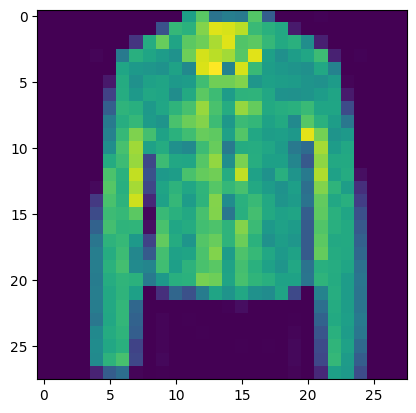

In [42]:
# Assuming 'x' contains the image data
plt.imshow(x.cpu().squeeze())  # Move tensor to CPU if using GPU
plt.show()